# Overfitting & Régularisation

# 1. Improting labraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 2. Importing dataset

In [2]:
df = pd.read_csv("mouse_viral_study.csv")
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [3]:
df

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


In [4]:
df.corr()

,Med_1_mL,Med_2_mL,Virus Present
Med_1_mL,1.000000,0.828090,-0.922304
Med_2_mL,0.828090,1.000000,-0.903718
Virus Present,-0.922304,-0.903718,1.000000


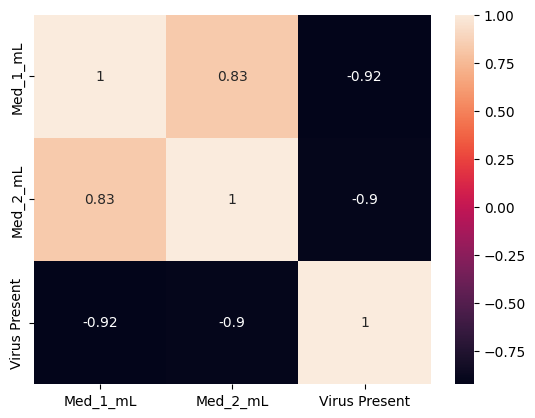

In [5]:
plt.figure()
sns.heatmap(df.corr(),annot=True)
plt.show()

# 3. Handling missing data

In [6]:
df.isnull().values.sum()

0

In [7]:
x = df[['Med_1_mL']].values
y = df[['Med_2_mL']].values

In [8]:
print(x.shape)
print(y.shape)

(400, 1)
(400, 1)


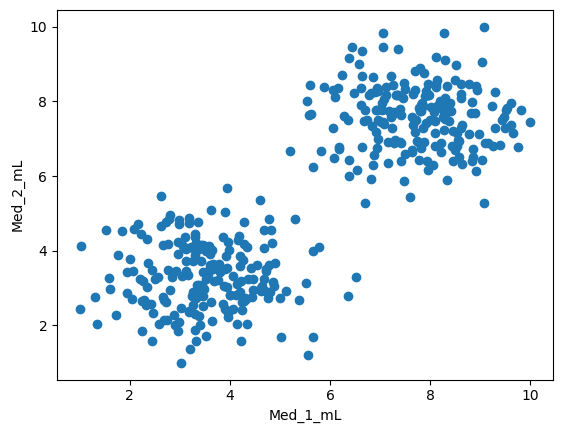

In [9]:
plt.plot(y, x, 'o')
plt.xlabel('Med_1_mL')
plt.ylabel('Med_2_mL')
plt.show()

# 4. Use the BIC to select the optimal polynomial model

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
X_train=np.array(X_train).reshape(-1, 1)

In [11]:
# Define maximum polynomial degree
max_degree = 17

# Initialize lists to store BIC values and models
bic_values = []
models = []

# Loop over polynomial degrees
for degree in range(1, max_degree+1):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    
    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Compute number of parameters
    num_params = X_train_poly.shape[1]
    
    # Compute log-likelihood
    y_train_pred = model.predict(X_train_poly)
    log_likelihood = -0.5 * len(X_train) * np.log(mean_squared_error(y_train, y_train_pred))
    
    # Compute BIC
    bic = -2 * log_likelihood + num_params * np.log(len(X_train))
    
    # Append BIC value and model
    bic_values.append(bic)
    models.append(model)

# Find index of model with lowest BIC
best_model_idx = np.argmin(bic_values)
best_model = models[best_model_idx]
best_degree = best_model_idx + 1

print(f"Best polynomial degree: {best_degree}")

Best polynomial degree: 9


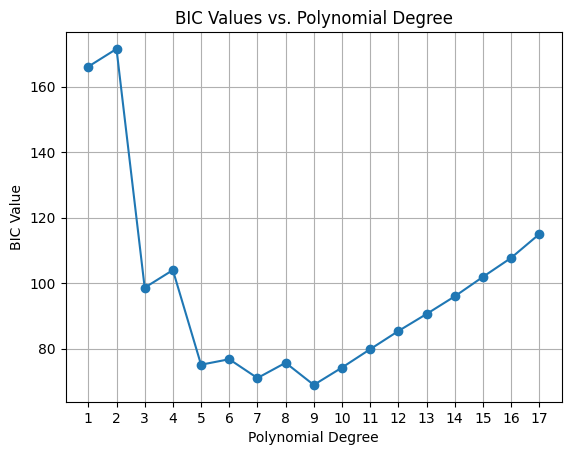

In [12]:
# Plot BIC values vs. polynomial degree
plt.plot(range(1, max_degree+1), bic_values, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('BIC Value')
plt.title('BIC Values vs. Polynomial Degree')
plt.xticks(range(1, max_degree+1))
plt.grid(True)
plt.show()

# 5. Matrice polynomiale (degree 17)

In [13]:
X = np.hstack((
    x,
    x**2,
    x**3,
    x**4,
    x**5,
    x**6,
    x**7,
    x**8,
    x**9,
    x**10,
    x**11,
    x**12,
    x**13,
    x**14,
    x**15,
    x**16,
    x**17))


print(X.shape)
print(X[:10])

(400, 17)
[[6.50823109e+00 4.23570720e+01 2.75669613e+02 1.79412154e+03
  1.16765576e+04 7.59937354e+04 4.94584791e+05 3.21887212e+06
  2.09491636e+07 1.36341998e+08 8.87345230e+08 5.77504782e+09
  3.75853458e+10 2.44614116e+11 1.59200519e+12 1.03611377e+13
  6.74326786e+13]
 [4.12611616e+00 1.70248346e+01 7.02464450e+01 2.89844992e+02
  1.19593410e+03 4.93456303e+03 2.03605803e+04 8.40101193e+04
  3.46635511e+05 1.43025838e+06 5.90141222e+06 2.43499123e+07
  1.00470567e+08 4.14553229e+08 1.71049478e+09 7.05770014e+09
  2.91208906e+10]
 [6.42787048e+00 4.13175189e+01 2.65583660e+02 1.70713737e+03
  1.09732579e+04 7.05346805e+04 4.53387790e+05 2.91431799e+06
  1.87328586e+07 1.20412389e+08 7.73995239e+08 4.97514115e+09
  3.19795629e+10 2.05560488e+11 1.32131620e+12 8.49324937e+12
  5.45935069e+13]
 [3.67295336e+00 1.34905864e+01 4.95502946e+01 1.81995921e+02
  6.68462529e+02 2.45523169e+03 9.01795150e+03 3.31225152e+04
  1.21657454e+05 4.46842153e+05 1.64123039e+06 6.02816267e+06
  2.21

In [14]:
#np.array[x**i for i in range(18)] 

In [15]:
y = y.reshape(-1,1)
y.shape

(400, 1)

# 6. Spliting the data to train and test

In [16]:
x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=101)

print('x_train shape  : ', x_train.shape)
print('x_test shape  : ', x_test.shape)
print('y_train shape  : ', y_train.shape)
print('y_test shape  : ', y_test.shape)

x_train shape  :  (280, 17)
x_test shape  :  (120, 17)
y_train shape  :  (280, 1)
y_test shape  :  (120, 1)


In [17]:
x_train.mean()

114822903030154.86

In [18]:
x_train.std()

1637458008805406.5

# 7. Normalization

In [19]:
def z_score_normalization(data):
    # Calcul des moyennes et des déviations standard de chaque caractéristique
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)

    # Normalisation des données en utilisant la méthode Z-score
    data_normalized = (data - mean) / std

    return data_normalized, mean, std

In [20]:
x_train_norm, mean, std = z_score_normalization(x_train)
x_train_norm

array([[-1.39347317, -1.16784237, -1.00402436, ..., -0.31225089,
        -0.28768701, -0.26607298],
       [-0.45017504, -0.61219361, -0.69799982, ..., -0.31220701,
        -0.28766717, -0.26606404],
       [ 0.99243654,  0.97155918,  0.90778994, ..., -0.0647672 ,
        -0.08869832, -0.10663982],
       ...,
       [ 0.80691995,  0.71816037,  0.59619516, ..., -0.20847741,
        -0.20894542, -0.2065355 ],
       [-1.43198909, -1.18246609, -1.00902223, ..., -0.31225089,
        -0.28768701, -0.26607298],
       [ 0.70109002,  0.58018138,  0.43427418, ..., -0.2505147 ,
        -0.24243674, -0.23302301]])

In [21]:
x_train_norm.mean()

-4.7767578874628587e-17

In [22]:
x_train_norm.std()

0.9999999999999998

In [23]:
mean

array([5.34144749e+00, 3.39105744e+01, 2.38954644e+02, 1.78631159e+03,
       1.38234289e+04, 1.09379141e+05, 8.79495253e+05, 7.16358981e+06,
       5.90031219e+07, 4.90939318e+08, 4.12390290e+09, 3.49555337e+10,
       2.98874295e+11, 2.57680595e+12, 2.23952521e+13, 1.96142015e+14,
       1.73053677e+15])

In [24]:
std

array([2.31937773e+00, 2.52266632e+01, 2.28647806e+02, 1.99315847e+03,
       1.73162390e+04, 1.51630265e+05, 1.34286785e+06, 1.20343257e+07,
       1.09061386e+08, 9.98402288e+08, 9.22135845e+09, 8.58262990e+10,
       8.04094588e+11, 7.57595210e+12, 7.17219799e+13, 6.81789607e+14,
       6.50399299e+15])

In [25]:
x_test_norm = (x_test - mean)/std

In [26]:
X_train_norm = np.hstack((x_train_norm, np.ones((x_train.shape[0], 1))))
X_test_norm = np.hstack((x_test_norm, np.ones((x_test.shape[0], 1))))
Y_train = y_train
Y_test = y_test

In [27]:
theta = np.random.randn(18, 1)
theta

array([[-0.39030473],
       [-0.95301499],
       [-2.21406144],
       [-1.18885779],
       [ 1.41251014],
       [-0.56128931],
       [ 0.04297346],
       [ 0.97387491],
       [ 1.05894199],
       [-1.21995456],
       [ 1.42535747],
       [ 0.10856035],
       [-0.87626544],
       [ 0.35982656],
       [-0.24106559],
       [-0.30754827],
       [ 0.76573819],
       [ 0.37569459]])

# 8. Modèle Linéaire

In [28]:
def model(X, theta):
    return X.dot(theta)

# 9. Fonction coût : Erreur Quadratique Moyenne

In [29]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [30]:
cost_function(X_train_norm, Y_train, theta)

24.45029842483468

# 10. Gradients et Descente de Gradient

In [31]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [32]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

# 11. Phase d'entrainement

In [33]:
n_iterations = 10000
learning_rate = 0.05

theta_final, cost_history = gradient_descent(X_train_norm, Y_train, theta, learning_rate, n_iterations)

# 12. Courbe d'apprentissage

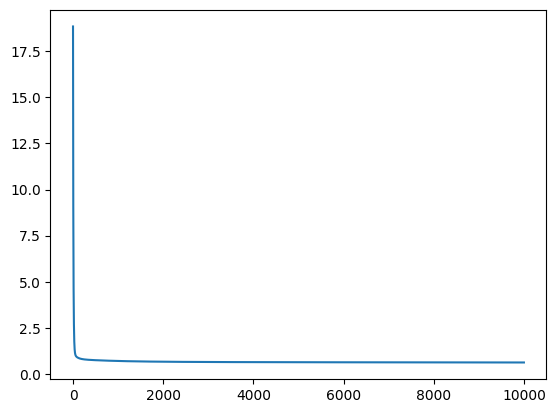

In [34]:
plt.plot(range(n_iterations), cost_history)
plt.show()

# 13. Evaluation du modèle - Coefficient de détermination

In [35]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [36]:
cd_train_Reg_Poly = coef_determination(Y_train, model(X_train_norm, theta_final))
print("Coefficient de détermination de training set = ", cd_train_Reg_Poly)

Coefficient de détermination de training set =  0.7748746935274642


In [37]:
cd_test_Reg_Poly = coef_determination(Y_test, model(X_test_norm, theta_final))
print("Coefficient de détermination de test set = ", cd_test_Reg_Poly)

Coefficient de détermination de test set =  0.7386750634407196


# 14. L1 Regularization (LASSO)

In [38]:
def cost_function_L1(X, y, theta, lambda_):
    m = len(y)
    h = model(X, theta)
    error = h - y
    regularization_term = lambda_ * np.sum(np.abs(theta))
    cost = (1 / (2 * m)) * np.sum(error ** 2) + regularization_term
    return cost

def grad_L1(X, y, theta, lambda_):
    m = len(y)
    h = model(X, theta)
    error = h - y
    regularization_term = lambda_ * np.sign(theta)
    grad = (1 / m) * X.T.dot(error) + regularization_term
    return grad

def gradient_descent_L1(X, y, theta, lambda_, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        theta = theta - learning_rate * grad_L1(X, y, theta, lambda_)
        cost_history[i] = cost_function_L1(X, y, theta, lambda_)
    return theta, cost_history

lambda_L1 = 0.017
theta_final_L1, cost_history_L1 = gradient_descent_L1(X_train_norm, Y_train, theta_final.copy(), lambda_L1, learning_rate, n_iterations)

# 15. L2 Regularization (Ridge)


In [39]:
def cost_function_L2(X, y, theta, lambda_):
    m = len(y)
    h = model(X, theta)
    error = h - y
    regularization_term = lambda_ * np.sum(theta ** 2)
    cost = (1 / (2 * m)) * np.sum(error ** 2) + regularization_term
    return cost

def grad_L2(X, y, theta, lambda_):
    m = len(y)
    h = model(X, theta)
    error = h - y
    regularization_term = lambda_ * theta
    grad = (1 / m) * X.T.dot(error) + regularization_term
    return grad

def gradient_descent_L2(X, y, theta, lambda_, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        theta = theta - learning_rate * grad_L2(X, y, theta, lambda_)
        cost_history[i] = cost_function_L2(X, y, theta, lambda_)
    return theta, cost_history

lambda_L2 = 0.017
theta_final_L2, cost_history_L2 = gradient_descent_L2(X_train_norm, Y_train, theta_final.copy(), lambda_L2, learning_rate, n_iterations)

# 16. Comparison of Models

In [40]:
# Calculate R-squared for each model
cd_train_L1 = coef_determination(Y_train, model(X_train_norm, theta_final_L1))
cd_test_L1 = coef_determination(Y_test, model(X_test_norm, theta_final_L1))
cd_train_L2 = coef_determination(Y_train, model(X_train_norm, theta_final_L2))
cd_test_L2 = coef_determination(Y_test, model(X_test_norm, theta_final_L2))

# Print R-squared values
print("L1 Regularization - Coefficient de détermination de training set =", cd_train_L1)
print("L1 Regularization - Coefficient de détermination de test set =", cd_test_L1)
print("L2 Regularization - Coefficient de détermination de training set =", cd_train_L2)
print("L2 Regularization - Coefficient de détermination de test set =", cd_test_L2)

L1 Regularization - Coefficient de détermination de training set = 0.7480830817465434
L1 Regularization - Coefficient de détermination de test set = 0.7488567548500061
L2 Regularization - Coefficient de détermination de training set = 0.7526575610083174
L2 Regularization - Coefficient de détermination de test set = 0.7553297865863385
